# MNS - CP - 6. Problem Set
_Assignment 6 (The Gate Model)_

### Ahmed Abdalfatah - Alice Mahraffa

## 1) Potassium Channel (K+)

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

K_REVERSAL = -77        # mV
K_CONDUC = 36*10**-6    # Siemens (should've been ^-9 but multiplied with 1000 to compensate for using milli votls)

def alpha_n(voltage):
    return (0.01* (voltage +  55)) / (1 - np.exp(-0.1 * (voltage + 55) ))

def beta_n(voltage):
    return 0.125 * np.exp(-0.0125 * (voltage + 65) )

def k_current(voltage, prob):
    return K_CONDUC * prob**4 * (voltage - K_REVERSAL)


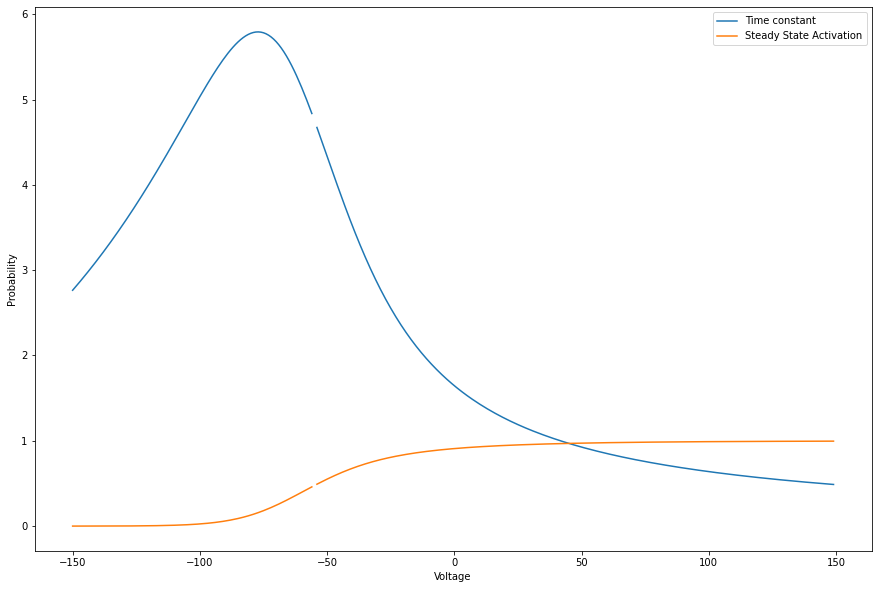

The steady state at -40mV


0.6785909741451827

In [60]:
def steady_state_activation(voltage):
    return alpha_n(voltage) / (alpha_n(voltage) + beta_n(voltage))

def time_constant(voltage):
    return 1 / (alpha_n(voltage) + beta_n(voltage))

voltages = np.arange(-150, 150, 1)

# Plotting time constant and n
plt.figure(figsize=(15, 10))
plt.plot(voltages, [time_constant(v) for v in voltages], label = "Time constant")
plt.plot(voltages, [steady_state_activation(v) for v in voltages], label = "Steady State Activation")
plt.xlabel("Voltage")
plt.ylabel("Probability")
plt.legend()
plt.show()

# The steady state at -40mV
print("The steady state at -40mV")
steady_state_activation(-40)

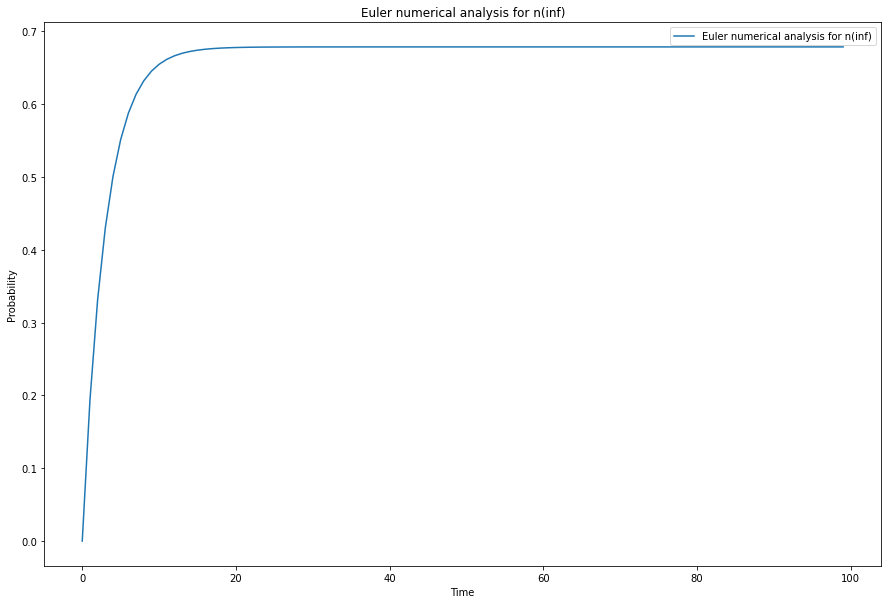

The probability at 23 seconds:


0.678283967180255

In [59]:
def change_in_prob(prob, voltage):
    return (alpha_n(voltage) * (1 - prob)) - (beta_n(voltage) * prob)

def euler(f_func, initial_value, t_max, dt, voltage_c=-40, clamp=False):
    t=dt
    initial_voltage = -65 if clamp else voltage_c
    x_values=[initial_value]
    current_values = [k_current(initial_voltage, initial_value)]
    while(t<=t_max):
        voltage = initial_voltage if t<2 else voltage_c
        new_prob_value = x_values[-1] + f_func(x_values[-1], voltage=voltage)*dt
        x_values.append(new_prob_value)
        current_values.append(k_current(voltage, new_prob_value))
        t += dt
    return x_values[:-1], current_values[:-1]

voltage = -40
change_in_prob_euler, current_values = euler(change_in_prob, 0, 100, 1, voltage_c=-40)
x_axis = np.arange(0, len(change_in_prob_euler), 1)

plt.figure(figsize=(15, 10))
plt.plot(x_axis, change_in_prob_euler, label="Euler numerical analysis for n(inf)")
plt.title("Euler numerical analysis for n(inf)")
plt.xlabel("Time")
plt.ylabel("Probability")
plt.legend()
plt.show()

# The probability at 23 seconds
print("The probability at 23 seconds:")
change_in_prob_euler[23]

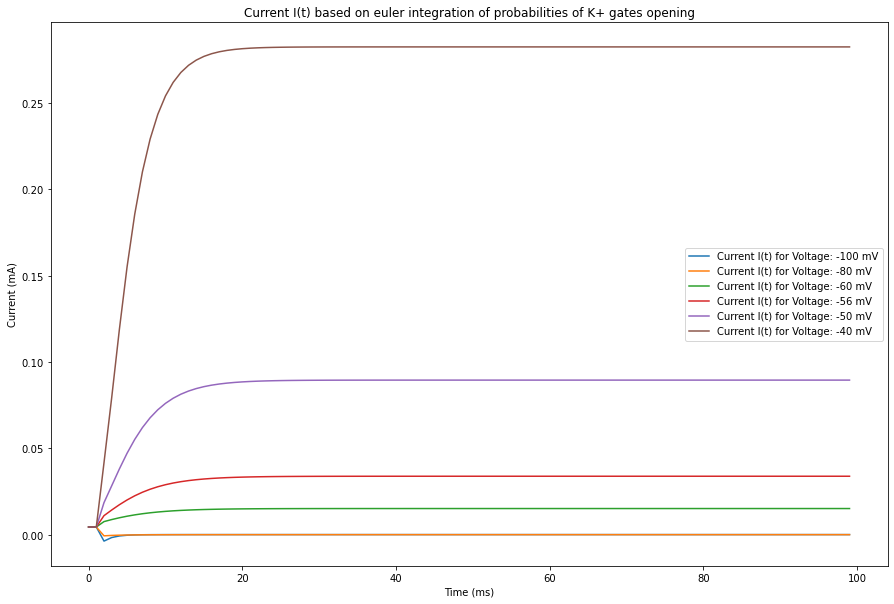


- The lower the voltage, the more potassium can move outside of the cell (along its concentration gradient). 
  Which causes the membrane voltage to be more positive.

- The steady state graph shows that activation of K+ gates starts increasing at around -70mV and peaks at around -40



In [69]:
# (d) VOLTAGE CLAMP

# Starting with voltage
def plot_current_for_voltage_clamp(voltage):
    change_in_prob_euler, current_values = euler(change_in_prob, 0.3177, 100, 1, voltage_c=voltage, clamp=True)
    x_axis = np.arange(0, len(current_values), 1)

    label = "Current I(t) for Voltage: {} mV".format(voltage)
    plt.plot(x_axis, [i*1000 for i in current_values], label=label)
    plt.xlabel("Time (ms)")
    plt.ylabel("Current (mA)")
    plt.title("Current I(t) based on euler integration of probabilities of K+ gates opening".format(voltage))

plt.figure(figsize=(15, 10))
plot_current_for_voltage_clamp(-100)
plot_current_for_voltage_clamp(-80)
plot_current_for_voltage_clamp(-60)
plot_current_for_voltage_clamp(-56)
plot_current_for_voltage_clamp(-50)
plot_current_for_voltage_clamp(-40)
plt.legend()
plt.show()


print("""
- The lower the voltage, the more potassium can move outside of the cell (along its concentration gradient). 
  Which causes the membrane voltage to be more positive.

- The steady state graph shows that activation of K+ gates starts increasing at around -70mV and peaks at around -40
""")

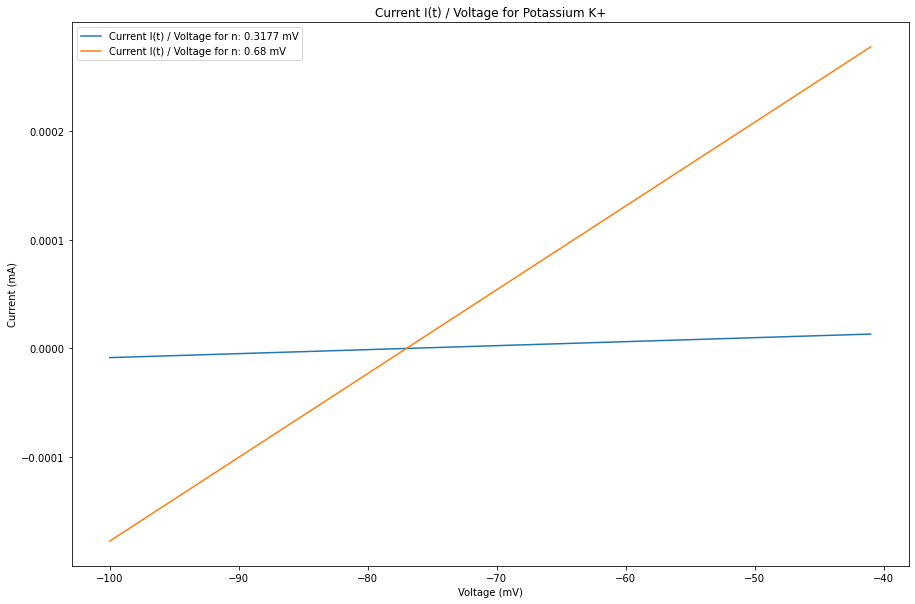

In [72]:
# (d) Current-Voltage plot
def plot_i_v(n):
    voltages = np.arange(-100,-40, 1)
    currents = [k_current(v, n) for v in voltages]
    
    label = "Current I(t) / Voltage for n: {} mV".format(n)
    plt.plot(voltages, currents, label=label)
    plt.xlabel("Voltage (mV)")
    plt.ylabel("Current (mA)")
    plt.title("Current I(t) / Voltage for Potassium K+")

plt.figure(figsize=(15,10))
plot_i_v(0.3177)
plot_i_v(0.68)
plt.legend()
plt.show()

-------------------------------------
